# Plotting the PDO

In [49]:
# Import necessary packages
import xarray as xr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import datetime, timedelta

In [50]:
# Import the PDO region anomaly index dataset
pdo = xr.open_dataset('daily_PDO_1836_2015.nc')
pdo

<xarray.Dataset>
Dimensions:     (time: 65744)
Coordinates:
  * time        (time) datetime64[ns] 1836-01-01 1836-01-02 ... 2015-12-31
Data variables:
    pdostdanom  (time) float64 ...

Text(0.5, 1.0, 'PDO Region Standardized Anomaly Index from 1836-2015')

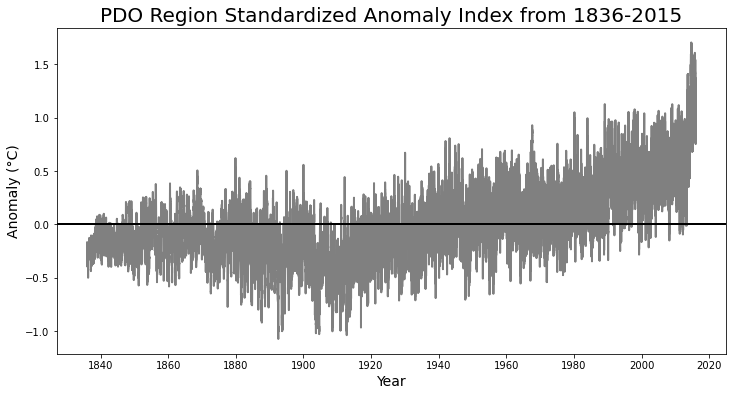

In [51]:
# Plots entire PDO dataset (1836-2015)
fig = plt.figure(figsize=(12, 6))
plt.plot(pdo.time, pdo.pdostdanom.values, linewidth=2, color='grey')
plt.axhline(0, color='black', lw=2)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Anomaly (°C)',fontsize=14)
plt.title('PDO Region Standardized Anomaly Index from 1836-2015',fontsize=20)

## Choose a start and end date to for plotting the PDO index.
- Dates are between 01-01-1836 and 12-31-2015
- Make sure the end date is after the start date

In [52]:
# User selects the start date and end date
x = widgets.DatePicker(description='Start Date')
y = widgets.DatePicker(description='End Date')
display(x)
display(y)

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

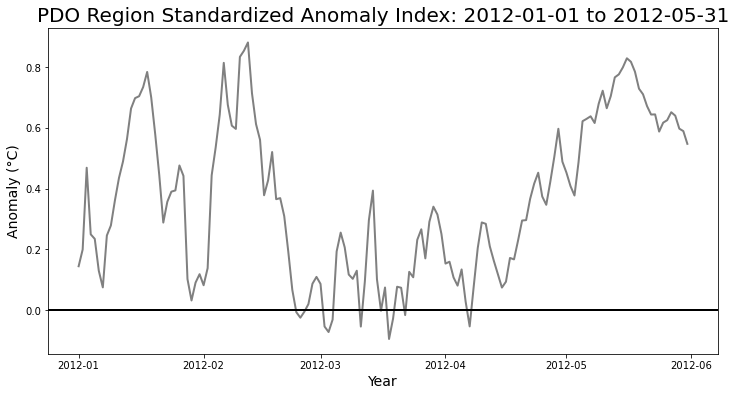

In [54]:
def Plot():
    # The start date criteria
    start = f'{x.value}T00:00:00'
    end = f'{y.value}T00:00:00'
    
    # Queries the pdo dataset based on user input
    PDO = pdo.sel(time=slice(start, end))
    
    # Creates the daily anomaly index figure
    plt.figure(figsize=(12, 6))
    plt.plot(PDO.time, PDO.pdostdanom.values, linewidth=2, color='grey')
    plt.axhline(0, color='black', lw=2)
    plt.xlabel('Year',fontsize=14)
    plt.ylabel('Anomaly (°C)',fontsize=14)
    plt.title(f'PDO Region Standardized Anomaly Index: {x.value} to {y.value}',fontsize=20)
    plt.show()

# Calls the plotting function
Plot()